In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
# load file and format
master = pd.read_csv("../data/master/studytime.csv")
master["day of week"] = pd.Categorical(master["day of week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [25]:
classes_and_colors = {
    'fa23': {
        'order' : ["STAT 107", "PHYS 213/214", "MATH 241", "HIST 164"],
        'colors' : ['orange', 'purple', 'red', 'tan']
    },
    'sp24': {
        'order' : ["STAT 207","MATH 257", "GEOL 107", "ASTR 210", "ANTH 103"],
        'colors' : ['orange', 'red', 'green', 'blue', 'tan']
    },
    'fa24': {
        'order' : ["IS 477", "CHEM 102/103", "GEOL 208", "ASTR 310", "ACES 179"],
        'colors' : ['orange', 'yellow', 'green', 'blue', 'tan']
    },
    'sp25': {
        'order' : ["CS 307", "CHEM 104/105", "GEOL 432", "ASTR 405", "Research"],
        'colors' : ['orange', 'yellow', 'green', 'blue', 'pink']
    },
}

In [26]:
def to_weekday_data(master, term, order=[]):
    df = master[master["term"] == term]
    df = df.groupby(['term', 'week', 'day of week', 'course']).agg('sum')[['duration']].reset_index()
    df = df.pivot(index=['term', "week", 'day of week'], columns='course', values='duration')
    df = df.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[order]
    return df

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4031943497.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['term', 'week', 'day of week', 'course']).agg('sum')[['duration']].reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4031943497.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[order]
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/2660387232.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

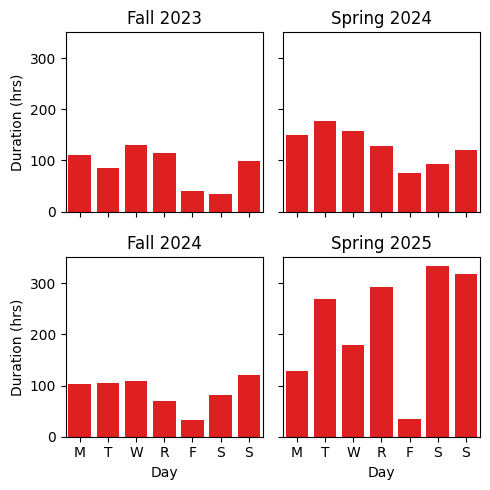

In [27]:
fig, ax = plt.subplots(2,2, figsize=[5,5], sharey=True, sharex=True)

for i, term in enumerate(['fa23', 'sp24', 'fa24', 'sp25']):
    if i == 0:
        x=0
        y=0
    if i == 1:
        x=0
        y=1
    if i == 2:
        x=1
        y=0
    if i == 3:
        x=1
        y=1

    df = to_weekday_data(master, term, classes_and_colors[term]['order'])
    sns.barplot(df.sum(axis=1), errorbar=('ci', False), ax=ax[x,y], color='red')
    ax[x,y].set_xlabel("Day")
    ax[x,y].set_ylabel("Duration (hrs)")
    ax[x,y].set_xticklabels(["M", "T", "W", "R", "F", "S", "S"])

# FIGURE
# Subplot Titles
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
ax[1,1].set_title("Spring 2025")

plt.tight_layout()
fig.savefig("../results/day_of_week_barplot.png")

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4037581570.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = master[master['term'] == term].set_index(['term', 'week'])[['day of week', 'course', 'duration']].groupby(['day of week', 'course']).agg('mean').reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4037581570.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[x,y].set_xticklabels(["M", "T", "W", "R", "F", "S", "S"], rotation=0)
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4037581570.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to

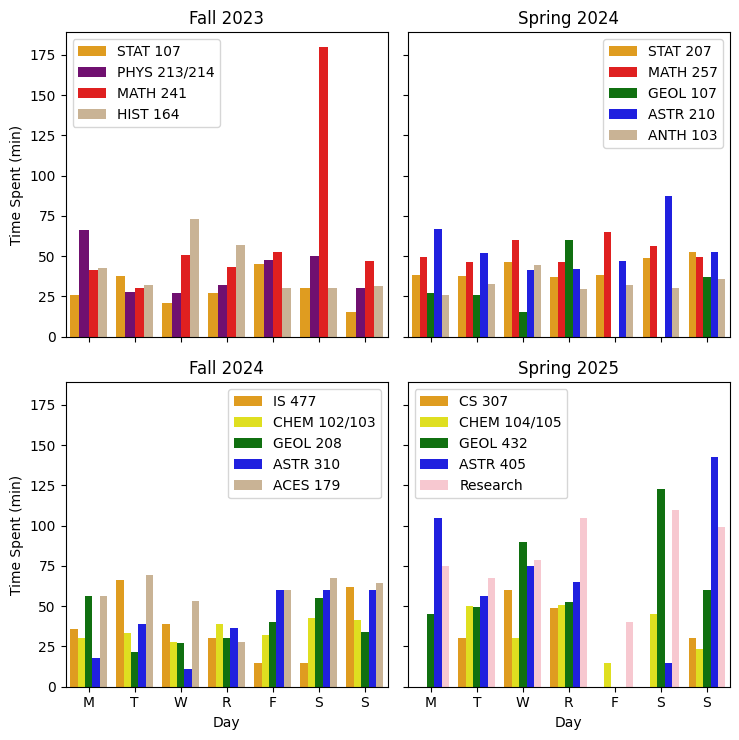

In [28]:
fig, ax = plt.subplots(2,2, figsize=[7.5,7.5], sharey=True, sharex=True)

for i, term in enumerate(['fa23', 'sp24', 'fa24', 'sp25']):
    if i == 0:
        x=0
        y=0
    if i == 1:
        x=0
        y=1
    if i == 2:
        x=1
        y=0
    if i == 3:
        x=1
        y=1

    bar_data = master[master['term'] == term].set_index(['term', 'week'])[['day of week', 'course', 'duration']].groupby(['day of week', 'course']).agg('mean').reset_index()
    sns.barplot(bar_data, x='day of week', y='duration', hue='course', errorbar=('ci', False), hue_order=classes_and_colors[term]['order'], palette=classes_and_colors[term]['colors'], ax=ax[x,y])
    ax[x,y].set_xticklabels(["M", "T", "W", "R", "F", "S", "S"], rotation=0)
    handles, labels = ax[x,y].get_legend_handles_labels()
    ax[x,y].legend(handles, labels)
    ax[x,y].set_ylabel("Time Spent (min)")
    ax[x,y].set_xlabel("Day")



# FIGURE
# Subplot Titles
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
ax[1,1].set_title("Spring 2025")

plt.tight_layout()
# fig.savefig("../results/day_of_week_by_class_barplot.png")


/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4031943497.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(['term', 'week', 'day of week', 'course']).agg('sum')[['duration']].reset_index()
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4031943497.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.reset_index().set_index(['term', 'week']).groupby('day of week').agg('mean')[order]
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_20168/4031943497.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True i

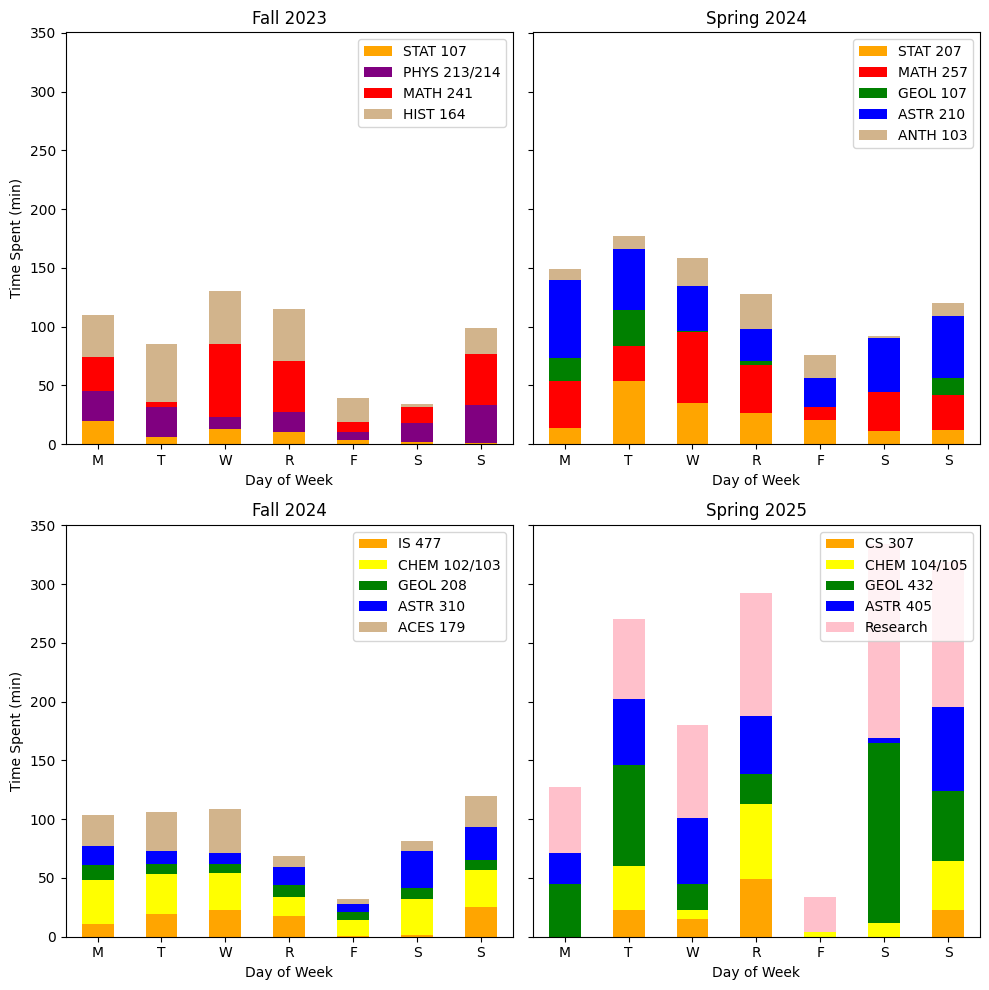

In [ ]:
fig, ax = plt.subplots(2,2, figsize=[10,10], sharey=True)

for i, term in enumerate(['fa23', 'sp24', 'fa24', 'sp25']):
    if i == 0:
        x=0
        y=0
    if i == 1:
        x=0
        y=1
    if i == 2:
        x=1
        y=0
    if i == 3:
        x=1
        y=1

    df = to_weekday_data(master, term, classes_and_colors[term]['order'])
    df.plot(kind='bar', stacked=True, color=classes_and_colors[term]['colors'], ax=ax[x,y])
    ax[x,y].set_xticklabels(["M", "T", "W", "R", "F", "S", "S"], rotation=0)
    ax[x,y].legend(df.columns, loc='upper right')
    ax[x,y].set_ylabel("Time Spent (min)")
    ax[x,y].set_xlabel("Day of Week")

# FIGURE
# Subplot Titles
ax[0,0].set_title("Fall 2023")
ax[0,1].set_title("Spring 2024")
ax[1,0].set_title("Fall 2024")
ax[1,1].set_title("Spring 2025")

plt.tight_layout()
# fig.savefig("../results/day_of_week_by_class_stacked_barplot.png")